<a href="https://colab.research.google.com/github/FoleyLab/data_repository/blob/main/2024__Exp_11_CO_PerryZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run this cell before beginning!

In [ ]:
# @title
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt

def extract_fit(x, y):
    """
    Fit a 3rd order polynomial to the data
    and return a dictionary containing the
    coefficients and the polynomial
    evaluated along a grid of 100 points
    """

    # fit polynomial
    coeffs,covM = np.polyfit(x, y, 3, cov=True)

    # Create a new x array for the fitted curve
    x_fit = np.linspace(x[0], x[-1], 100)

    # Evaluate the fitted curve at the new x value
    y_fit = np.polyval(coeffs, x_fit)

    # save data to a dictionary for returning
    fit_dict = {
      "a0" : coeffs[3],
      "a0 Std. Error" : np.sqrt(covM[3,3]),
      "a1" : coeffs[2],
      "a1 Std. Error" : np.sqrt(covM[2,2]),
      "a2" : coeffs[1],
      "a2 Std. Error" : np.sqrt(covM[1,1]),
      "a3" : coeffs[0],
      "a3 Std. Error" : np.sqrt(covM[0,0]),
      "x-fit" : x_fit,
      "y-fit" : y_fit,
      "cov" : covM
    }
    return fit_dict


# prefix url for data files that students will upload
_url_prefix = "https://raw.githubusercontent.com/FoleyLab/data_repository/main/CO_Spectroscopic_data/"
_reference_fund_url = "https://raw.githubusercontent.com/FoleyLab/data_repository/main/CO_Spectroscopic_data/CO_fundamental_reference_data.csv"
_reference_over_url = "https://raw.githubusercontent.com/FoleyLab/data_repository/main/CO_Spectroscopic_data/CO_overtone_reference_data.csv"

_reference_fundamental = np.loadtxt(_reference_fund_url,  delimiter=',')
_reference_overtone = np.loadtxt(_reference_over_url, delimiter=',')

# fundamental
_r_x_f = _reference_fundamental[:,1]
_r_y_f = _reference_fundamental[:,0]

# overtone
_r_x_o = _reference_overtone[:,1]
_r_y_o = _reference_overtone[:,0]

# extract parameters from data
_ref_fund_dict = extract_fit(_r_x_f, _r_y_f)
_ref_over_dict = extract_fit(_r_x_o, _r_y_o)


# constants Need to make this into an equation
_reference_mu_CO = 1.1385e-26
_reference_mass_C12 = 1.99e-26
_reference_mass_O16 = 2.656e-26
_reference_c_cms = constants.c * 100
_reference_a0_f = _ref_fund_dict["a0"]
_reference_a1_f = _ref_fund_dict["a1"]
_reference_a2_f = _ref_fund_dict["a2"]
_reference_a3_f = _ref_fund_dict["a3"]
_reference_a0_o = _ref_over_dict["a0"]
_reference_a1_o = _ref_over_dict["a1"]
_reference_a2_o = _ref_over_dict["a2"]
_reference_a3_o = _ref_over_dict["a3"]
_reference_alpha_f = 0.017506389984477955
_reference_alpha_o = 0.035010222139057766
_reference_Be_f = 1.9311559637590645
_reference_Be_o = 1.940110881960663
_reference_D_f = 6.060731667962634e-06
_reference_D_o = 6.352601518484235e-06
_reference_I_f = 1.4495334591456917e-46
_reference_I_o = 1.4428428861079222e-46
_reference_req_f = 1.1283597989456911e-10
_reference_req_o = 1.1257527169485772e-10
_reference_nu_e = 2169.6214211228644
_reference_nu_xe = 13.224967570058652
_reference_k = 1901.5252543663048
_reference_beta = 23192150909.946667
_reference_De = 1.767624634453031e-18

# Extracting the spectroscopic parameters from spectral data
## The Rotation-Vibration Spectrum of a diatomic molecule
1. Read experimental data from .txt file
    * 3 files (fundamental C-12, Fund. C-13, overtone C-12)
    * Students must set up a file in x,y format with headers m & Wavenumbers (cm^-1)
2. Fit a cubic polynomial to the data
3. Use fitting parameters to calculate stuff
4. propagate error from fitting parameter uncertainties

###Instructions:
You will not be writing a full report for Experiment 11.  You will be turning in this (1) Colab document, (2) a pdf of your spectra, and (3) a hand written copy of your calculations.  
To make a copy of this colab notebook, go to File--> Save a copy in Drive Change the name of the file to your last name_Exp11.  To give me editor access, to go the Share icon in the top right hand and add bwoods22@charlotte.edu as an editor.

The theory and background needed for this experiment can be found in the lab textbook (Experiments in Physical Chemistry 9th Ed. by Nibler et.al.)  and the handout found on Canvas. You will need these resources in order to complete this lab.

# Introduction

By the end of the experiment, students will be able to:

* Set up appropriate parameters for FITR using a gas manifold to fill gas cell.
* Identify R and P branches in IR spectra
* Identify and label m values for IR spectra
* Use python coding to create equations to fit data and calculate results
* Calculate bond length, α, $B_e$ , D for C-O for harmonic oscillator model, for C-12 & C-13 and for the first overtone
* Calculate the anharmonicity and discuss the limitations of the harmonic oscillator model
* Compare experimental values of bond length, $B_e$, and D to theoretical values found from fitting the Morse Pontential from computational data
* Propagate error from fitting parameters to determine the uncertainty of computed values and determine the source of highest error.


# Experimental Parameters
These values will not be used for calculations but do need to be noted.

**Table 1. Experimental set-up information**

| Parameter     | Value (with proper units)  |
| ----------- | ----------- |
| Resolution     |   text     |
| Scan range   | Text        |
|Pressure for overtone| text|
|Pressure for fundamental| text|

 Mention any issues or changes to procedures here:



# Uploading your data
**Save your IR data using the following naming conventions**:
"CO_fundamental_LastNamesOfTeamMembers.csv" for the fundamental data where you have used the last names of all team members using [Camel Case](https://en.wikipedia.org/wiki/Camel_case).  Use the same style and last name order for the overtone and isotope data, (e.g. "CO_overtone_LastNamesOfTeamMembers.csv", etc).
* Must be .csv file with the format of wavenumber, m-value
* File should not have a header, but should start with the first line of data
* File should not have a new-line or carriage return after the final value of data

After you have uploaded your data to [this folder](https://github.com/FoleyLab/data_repository/tree/main/CO_Spectroscopic_data), update the file name variables below and run the code block.

In [ ]:
fundamental_filename = "CO_fundamental_reference_data.csv" #<== replace with the name of the file containing your fundamental data
overtone_filename = "CO_overtone_reference_data.csv" #<== replace with the name of the file containing your overtone data
isotope_filename = "CO_fundamental_reference_data.csv" #<== replace with the name of the file containing your isotope data
my_fundamental_url = _url_prefix + fundamental_filename
my_overtone_url = _url_prefix + overtone_filename
my_isotope_url = _url_prefix + isotope_filename
print(my_fundamental_url)
print(my_overtone_url)

https://raw.githubusercontent.com/FoleyLab/data_repository/main/CO_Spectroscopic_data/CO_fundamental_reference_data.csv
https://raw.githubusercontent.com/FoleyLab/data_repository/main/CO_Spectroscopic_data/CO_overtone_reference_data.csv


#Plotting your data
The following code blocks will plot the data for the fundamental and overtone for C-12 isotope of CO, you will need to modify the code responsible for labeling the x- and y- axis with the correct labels with units.

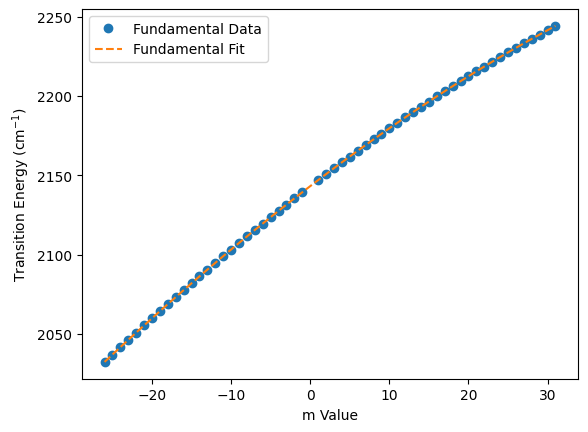

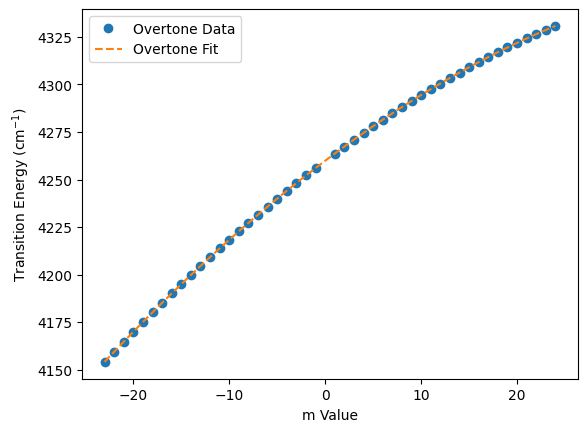

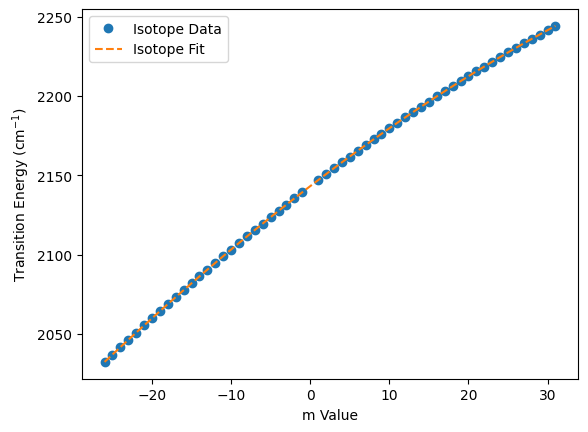

 Results from NumPy Curve Fit to Fundamental Data
 a0: 2143.171485982747 +/- 0.002326147106302213 cm^-1
 a1: 3.827299147549173 +/- 0.00021824052644139793 cm^-1
 a2: -0.017506389984477955 +/- 6.762776566551093e-06 cm^-1
 a3: -2.4242926671850537e-05 +/- 4.059175373665849e-07 cm^-1
 
 Results from NumPy Curve Fit to Overtone Data
 a0: 4259.893036825377 +/- 0.0018331588611932791 cm^-1
 a1: 3.8102013196432103 +/- 0.0002150382681547577 cm^-1
 a2: -0.035010222139057766 +/- 7.092512912654886e-06 cm^-1
 a3: -2.541040607393694e-05 +/- 5.717852991413751e-07 cm^-1
 
 Results from NumPy Curve Fit to Isotope Data
 a0: 2143.171485982747 +/- 0.002326147106302213 cm^-1
 a1: 3.827299147549173 +/- 0.00021824052644139793 cm^-1
 a2: -0.017506389984477955 +/- 6.762776566551093e-06 cm^-1
 a3: -2.4242926671850537e-05 +/- 4.059175373665849e-07 cm^-1


In [ ]:
# Write a helper function to reduce code overload
def plot_data(x_values, y_values, x_fit, y_fit, data_label):
  # Plot the data and the fitted curve
  plt.plot(x_values, y_values, 'o', label=f"{data_label} Data")
  plt.plot(x_fit, y_fit, '--', label=f"{data_label} Fit")
  plt.xlabel("m Value")
  plt.ylabel("Transition Energy (cm$^{-1}$)")
  plt.legend()
  plt.show()

data_f = np.loadtxt(my_fundamental_url,  delimiter=',')
data_o = np.loadtxt(my_overtone_url, delimiter=',')
data_i = np.loadtxt(my_isotope_url, delimiter=',')

# fundamental
x_f = data_f[:,1]
y_f = data_f[:,0]

# overtone
x_o = data_o[:,1]
y_o = data_o[:,0]

# isotope
x_i = data_i[:,1]
y_i = data_i[:,0]


# extract parameters from data
fund_dict = extract_fit(x_f, y_f)
over_dict = extract_fit(x_o, y_o)
iso_dict = extract_fit(x_i, y_i)

# get lines of best fit from data
x_f_fit = fund_dict["x-fit"]
y_f_fit = fund_dict["y-fit"]

x_o_fit = over_dict["x-fit"]
y_o_fit = over_dict["y-fit"]

x_i_fit = iso_dict["x-fit"]
y_i_fit = iso_dict["y-fit"]

# Plot the data and the fitted curve
plot_data(x_f, y_f, x_f_fit, y_f_fit, 'Fundamental')

# Plot the data and the fitted curve
plot_data(x_o, y_o, x_o_fit, y_o_fit, 'Overtone')

# Plot the data and the fitted curve
plot_data(x_i, y_i, x_i_fit, y_i_fit, 'Isotope')


print(F' Results from NumPy Curve Fit to Fundamental Data')
print(F' a0: {fund_dict["a0"]} +/- {fund_dict["a0 Std. Error"]} cm^-1')
print(F' a1: {fund_dict["a1"]} +/- {fund_dict["a1 Std. Error"]} cm^-1')
print(F' a2: {fund_dict["a2"]} +/- {fund_dict["a2 Std. Error"]} cm^-1')
print(F' a3: {fund_dict["a3"]} +/- {fund_dict["a3 Std. Error"]} cm^-1')
print(" ")
print(F' Results from NumPy Curve Fit to Overtone Data')
print(F' a0: {over_dict["a0"]} +/- {over_dict["a0 Std. Error"]} cm^-1')
print(F' a1: {over_dict["a1"]} +/- {over_dict["a1 Std. Error"]} cm^-1')
print(F' a2: {over_dict["a2"]} +/- {over_dict["a2 Std. Error"]} cm^-1')
print(F' a3: {over_dict["a3"]} +/- {over_dict["a3 Std. Error"]} cm^-1')
print(" ")
print(F' Results from NumPy Curve Fit to Isotope Data')
print(F' a0: {iso_dict["a0"]} +/- {iso_dict["a0 Std. Error"]} cm^-1')
print(F' a1: {iso_dict["a1"]} +/- {iso_dict["a1 Std. Error"]} cm^-1')
print(F' a2: {iso_dict["a2"]} +/- {iso_dict["a2 Std. Error"]} cm^-1')
print(F' a3: {iso_dict["a3"]} +/- {iso_dict["a3 Std. Error"]} cm^-1')

#Interpreting plots
Before moving on, take a moment to analyze the plots and describe them. Double click in this textbook to edit and add your answers.

**Question 1**: Make sure your graph is reasonable.  Does the data points fit on the regression line?  Does the trend between frequency and m values behave as you expect?  If you had to remove data points, mention it here.

**Question 2**: Compare the energy level of the overtone and fundamental:

What is the fundamental transtion?

What vibrational transition does the overtone account for?

What is the approximate ratio of the overtone to the fundamental experimental values?

Does the plot agree with your expectations of the energy difference between the two transitions? Why or why not?

##Finding the fitting parameters

We will now compute rotational and vibrational parameters from this fit.
The following block will store the polynomial coefficients from the fundamental, overtone, and isotope
data.  The  cubic polynomial fit (Eqn 21 in the handout) for each data set is:

$$ \bar{\nu} = a_0 + a_1 m + a_2 m^2 + a_3 m^3 $$

We will associate the coefficients from the fundamental data as follows:

$a_n \rightarrow $ `an_f`

from the overtone data as

$a_n \rightarrow $ `an_o`

and from the isotope data as

$a_n \rightarrow $ `an_i`

We will work through the fundamental and overtone for C-12 and then you will replicate the process of the fundamental for C-13 using similar codes.

In [ ]:
a0_f = fund_dict["a0"]
a1_f = fund_dict["a1"]
a2_f = fund_dict["a2"]
a3_f = fund_dict["a3"]

a0_o = over_dict["a0"]
a1_o = over_dict["a1"]
a2_o = over_dict["a2"]
a3_o = over_dict["a3"]

# need isotope data
a0_i = iso_dict["a0"]
a1_i = iso_dict["a1"]
a2_i = iso_dict["a2"]
a3_i = iso_dict["a3"]



# print coefficients
#print(F'a0 for the fundamental: {a0_f}')
#print(F'a1 for the fundamental: {a1_f}')
#print(F'a2 for the fundamental: {a2_f}')
#print(F'a3 for the fundamental: {a3_f}')
#print(F'a0 for the overtone: {a0_o}')
#print(F'a1 for the overtone: {a1_o}')
#print(F'a2 for the overtone: {a2_o}')
#print(F'a3 for the overtone: {a3_o}')
#print(F'a0 for the isotopomer: {a0_i}')
#print(F'a1 for the isotopomer: {a1_i}')
#print(F'a2 for the isotopomer: {a2_i}')
#print(F'a3 for the isotopomer: {a3_i}')

Next we will complete some functions that will to enable us to compute various rotational and vibrational properties. The format for this section is as follows:

1. We will provide the relevant equation
2. We will provide a related function template with documentation that you must complete with python code that implements the relevant equation
3. We will provide a block of code to be completed that calls the relevant function on your stored data to compute properties from your data.

A.  Implement a function to compute reduced mass based on the equation

$$ \mu = \frac{m_A m_B}{m_A + m_B} $$

In [ ]:
def compute_reduced_mass(mass_a, mass_b):
    """
    Compute reduced mass using this formula

    mu = mass_a * mass_b / (mass_a + mass_b)

    Arguments
    ---------
    mass_a : float
        the mass of atom a in kg (e.g. mass of C)

    mass_b : float
        the mass of atom b in kg (e.g. mass of O)

    Returns
    -------
    mu : float
        the reduced mass of the diatomic (e.g. reduced mass of CO)
    """

    #<== insert code to compute mu here

    return mu

# Call the compute_reduced_mass function on reference masses of carbon 12 and carbon 16 and store the result in computed_mu_CO

computed_mu_CO = compute_reduced_mass(_reference_mass_C12, _reference_mass_O16)

# we are go
assert np.isclose(computed_mu_CO * 1e20, _reference_mu_CO * 1e20)

NameError: name 'mu' is not defined

Define the mass of $^{12}$C and $^{16}$O in kilograms and store to the variables `mass_C12` and `mass_O16`
and then call the `compute_reduced_mass()` function on those two masses and store the output to
`mu_CO`.

In [ ]:
#<== assign mass of carbon 12 here


#<== assign mass of oxygen 16 here


#<== compute reduced mass of CO here


#<== print mu_CO

assert np.isclose(mu_CO * 1e20, _reference_mu_CO * 1e20)

##Rotational Parameters
We will first start with analyzing the data to calculate the rotational parameters: $B_e$ , $ \alpha_e$, D, $I_e$, and $r_e$. Before we get into the calculations, let's pause and make sure we understand what the parameters mean so when you calculate the values you can determine if they are reasonable.

**Question 3**: What does each of the variables mean?  Define all 5 variables.


| Parameter     | Definition  |
| ----------- | ----------- |
| $B_e$|   text     |
| $ \alpha_e$| Text        |
|$D$| text|
|$I_e$| text|
|$r_e$ | text|

**Question 4**:Before analyzing your data, let's make some predictions. What kind of bond is between the C and O in CO?  

Would the number of bonds impact the moment of interia?  Defend your answer in 2 to 3 sentences. Defend your answer in 2 to 3 complete sentences.

If we were examining NO instead of CO, would the moment of inertia be affected?  Defend your answer in 2 to 3 complete sentences.



**Question 5:** The spacing between the rotational peaks is not constant for a rovibrational spectrum. Which contribution to the term energy leads to changes in the spacing between peaks?

###Calculation of rotational parameters
These equations are the same as in your handout and textbook, they are repeated here for your convenience.
$$ \alpha = -a_2 $$


In [ ]:
def compute_alpha(a_2):
    """
    Compute the \alpha value from a given a_2 value using the formula
    alpha = - a_2

    Arguments
    ---------
    a_2 : float
        the quadratic coefficient a_2 from your polynomial fit

    Returns
    -------
    alpha : float
        The quadratic contribution to the rotational constant
    """

    #<== insert code to compute alpha here

    return alpha

assert np.isclose(compute_alpha(_reference_a2_f), _reference_alpha_f)

Compute an $\alpha$ value for your fundamental data using the variable `a2_f` as input and
store it to a variable called `alpha_f`.  Then, compute an $\alpha$ value for your overtone data
using the variable `a2_o` as input and store it to a variable called `alpha_o`.

In [ ]:
#<== insert code to compute and print alpha_f from a2_f using the compute_alpha() function


$$ B_e = \frac{a_1}{2} + \alpha $$

In [ ]:
def compute_Be(a_1, a_2):
    """
    Compute the Be value from given a_1 and a_2 values, using the formula
    Be = a_1 / 2 + alpha

    where you can use the compute_alpha() function to compute alpha from a_2

    Arguments
    ---------
    a_1 : float
        the linear coefficient from your polynomial fit

    a_2 : float
        the quadratic coefficient from your polynomial fit

    Returns
    -------
    Be : float
        The rotational constant in wavenumbers

    """

    #<== insert code to compute alpha here


    #<== insert code to compute Be here

    return Be

assert np.isclose(compute_Be(_reference_a1_f, _reference_a2_f), _reference_Be_f)

In [ ]:
# Be for fundamental


# Be for overtone


#print values

$$ I = \frac{h}{8 \pi^2 c B_e} $$

In [ ]:
def compute_I(Be):
    """
    Compute the moment of inertia I value from given Be value using the formula
    I = h / (8 * pi^2 * c * Be)

    Arguments
    ---------
    Be : float
        the rotational constant in wavenumbers

    Returns
    -------
    I : float
        The moment of inertia in SI units (kg * m^2)

    """
    # speed of light in cm / s
    c = constants.c * 100


    # Planck's constant in SI units
    h = constants.h


    #<== insert code to compute I here

    return I

assert np.isclose(compute_I(_reference_Be_f), _reference_I_f)

In [ ]:
# I for fundamental


# I for overtone

#print values

$$ r_e = \sqrt{\frac{I}{\mu} } $$


In [ ]:
def compute_re(I, mu):
    """
    Compute the equilibrium bondlength from the moment of inertia and reduced mass
    re = sqrt{ I / mu }

    Arguments
    ---------
    I : float
        the rotational constant in SI units

    mu : float
        the reduced mass in SI units

    Returns
    -------
    re : float
        The equilibrium bondlength in SI units

    """
    #<== insert code to compute re here!

    return re

assert np.isclose(compute_re(_reference_I_f, _reference_mu_CO), _reference_req_f)

In [ ]:
# equilibrium bondlength from fundamental


# equibibrium bondlength from overtone


#print values


$$ D = -\frac{a_3}{4} $$

In [ ]:
def compute_D(a_3):
    """
    Compute the dissociation energy in wavenumbers
    D = -a_3 / 4

    Arguments
    ---------
    a_3 : float
        the cubic coefficient from your polynomial fit

    Returns
    -------
    D : float
        The dissociation energy in wavenumbers

    """
    #<== insert code to compute D here!


    return D

assert np.isclose(compute_D(_reference_a3_f), _reference_D_f)

In [ ]:
# D for fundamental


# D for overtone


#print

##Vibrational Parameters
In this section you will calculate the vibrational parameters: $ν ̃_e$, $ν ̃_e x_e, $ $k$, β, and $D_e$.  You will need to use the fundamental and overtone values to determine these parameters. As before, we will start by defining each variable

**Question 6:** Define all 5 variables:

| Parameter     | Definition  |
| ----------- | ----------- |
| $ν ̃_e$|   text     |
| $ν ̃_e x_e$| Text        |
|$k$| text|
|$β$| text|
|$D_e$| text|


**Question 7**: What are the SI units of the force constant?

**Question 8:** You are asked to explain force constants and springs to a middle school science class. You are given balls and springs of different kinds. In 2 to 4 sentences, how are you going to explain the concepts using the provided resources?

**Question 9:**  Does the bond type (single, double, triple) impact the force constant? Explain your reasoning and defend your answer in 2 to 5 sentences.

**Question 10:**  The contributions from the anharmonic terms to the transition frequency change with higher energy overtones. Would you expect these contributions to be more or less important for highly stretched or compressed configurations? Explain your reasoning in 2 to 5 sentences.


$$ v_e = 3 a_{0,f} - a_{0,o} $$

In [ ]:
def compute_nu_e(a0_f, a0_o):
    """
    Compute the Harmonic frequency
    nu_e = 3 a0_f - a0_o

    Arguments
    ---------
    a0_f : float
        the constant coefficient from the polynomial fit to fundamental data

    a0_o : float
        the constant coefficient from the polynomial fit to the overtone data

    Returns
    -------
    nu_e : float
        The harmonic approximation to the vibrational frequency in wavenumbers

    """
    #<== insert code to compute nu_e here!


    return nu_e

assert np.isclose(compute_nu_e(a0_f, a0_o), _reference_nu_e)

In [ ]:

#print value
print(ve)

$$ v_{xe} = \frac{v_e - a_{0,f}}{2} $$

In [ ]:
def compute_nu_xe(nu_e, a0_f):
    """
    Compute the anharmonic correction
    nu_xe = (nu_e - ao_f) / 2

    Arguments
    ---------
    nu_e : float
        the harmonic vibrational contribution

    a0_f : float
        the constant coefficient from the polynomial fit to the fundamental data

    Returns
    -------
    nu_xe : float
        The anharmonic correction in wavenumbers

    """
    #<== insert code to compute nu_xe here!


    return nu_xe

assert np.isclose(compute_nu_xe(_reference_nu_e, _reference_a0_f), _reference_nu_xe)

In [ ]:
#print value

$$ k = (2 \pi c v_e)^2 \cdot \mu $$

In [ ]:
def compute_k(nu_e, mu):
    """
    Compute the Harmonic force constant k = (2 * pi * c * nu_e)^2  * mu

    Arguments
    ---------
    nu_e : float
        the harmonic vibrational contribution

    mu : float
        the reduced mass in SI units

    Returns
    -------
    k : float
        The harmonic force constant in SI units (kg * m^2 / s^2)

    """
    # speed of light in cm / s
    c = constants.c * 100


    #<== insert code to compute k here


    return k

assert np.isclose(compute_k(_reference_nu_e, _reference_mu_CO), _reference_k)

In [ ]:
#print values

$$ \beta = \sqrt{\frac{8 \pi^2 \cdot c \cdot v_{xe} \cdot \mu}{h}} $$

In [ ]:
def compute_beta(nu_xe, mu):
    """
    Compute the Harmonic force constant beta = sqrt( ( 8 pi^2 c nu_xe mu ) / h )

    Arguments
    ---------
    nu_se : float
        the anharmonic vibrational contribution

    mu : float
        the reduced mass in SI units

    Returns
    -------
    beta : float
        The exponential factor for the Morse potential

    """
    # speed of light in cm / s
    c = constants.c * 100

    # plancks constant in SI units
    h = constants.h
    #insert code to calculate beta


    return beta

assert np.isclose(compute_beta(_reference_nu_xe, _reference_mu_CO), _reference_beta)

$$ D_e = \frac{k}{2\beta^2} $$

In [ ]:
def compute_De(k, beta):
    """
    Compute the dissociation energy

    Arguments
    ---------
    k : float
        the harmonic force constant

    beta : float
        the exponential term in the Morse potential

    Returns
    -------
    De : float
        The dissociation energy in SI units

    """

    #<== insert code to compute and print De here


    return De

assert np.isclose(compute_De(_reference_k, _reference_beta), _reference_De)

##Isotope Effect

Now that you have processed the fundamental and overtone spectra for C-12, you will need to repeat the steps for the fundamental spectrum for C-13.  Before you do, let's pause and think about the data before doing calculations.

**Question 11:**  Based on your answer to Question 4, would you expect the bond length of C-O to be different for different isotopes? Assume bond strength isn't changing, just the masses. Defend your statements in 2 to 3 sentences.

**Question 12:**  Looking at the IR spectrum of the fundamental, you will notice the location of vibrational energy to be offset for C-12 compared to C-13.  Why do you think this occurred? Defend your statements in 1 to 2 sentences.

**Question 13:** The intensity of the peaks in the spectrum are related to the populations of the initial states for each transition.  Compare and contrast the the C-13 peaks to the C-12 peaks with respect to abundance of each isotope

In [ ]:
#upload isotope data, give specific details?

In [ ]:
#Use the code blocks for plotting to plot the fundamental of C-13 isotope and fit the data.  Make sure to include labels.



In [ ]:
# Use the appropriate code blocks to calculate the relevant rotational and vibrational parameters for C-13 isotope.  Hint:  You won't be able to calculate all the same parameters as we aren't able to collect an overtone spectrum.

#End of lab questions
Now that you have analyzed your data and performed the necessary calculations, you will need to do error propagation on your values.  For the error, you will need to hand write the work, including units and proper significant figures.  Write out the equation before you rearrange to make it clear on what values you are solving for.  You will turn in the handwritten calculations as a .pdf along with this colab.  You can combine the spectra and the calculations in one file, but it is not mandatory.  

***Complete the end of report questions, for literature values make sure to cite your sources and values should be presented in the same units as calculated values for comparisons. Support your statements and conclusions with your data, mention specifics. ***

1) Put data in a table with proper units, sig figs, and if needed, scientific notation.  Don't forget your uncertainty values! (Create a table)



| Variable     |  C-12-fundamental  |C-12-overtone  |C-13 fundamental|
| ----------- | ----------- | ----------- | ----------- |
| variable|   value with units     | value with units    |value with units    |

2) What was the value of $r_e$ calculated through Gaussian (with it's uncertainity) for the Data Analysis assignment?  Look up the literature value of the bond length for C-O. (With citation)

Compare and contrast the theoretical value found through Gaussian to the experimental value you calculated for C-12.  Do they agree within error?  If not, come up with at least 2 reasons to explain the descripency.


 Compare and contrast to literature value (cite your source and if possible, mention how the literature value was determined, e.g. computationally or experimentally and if so what were the parameters?Do they agree within error?  If not, come up with at least 2 reasons to explain the descripency.



3) What was the value for the force constant?  What does the value tell you able the system?  You may find it helpful to look up values of different bond types.  


4) a) Compare and contrast the harmonic and Morse oscillator models by stating the assumptions made for each. Which model produced more accurate predictions of the physical parameters for the fundamental? What about the overtone and isotopic data? There are several variables you calculated that should be used to support your statements.


b) What are the assumptions of the rigid rotor model? Considering these assumptions for rotational motion and those from part a) for the vibrational models, are these assumptions reasonable for the CO system? There are several variables you calculated that should be used to support your statements.


5)  What were the values you calculated for the well depth from Gaussian and the experimental data?  What were the values you calculated for the well shape from Gaussian and the experimental data? Compare and contrast these values and methods of obtaining the values.  

6) Critique your theoretical predictions of the rovibrational constants by comparing with your measured experimental results. Was the method and basis set you used able to achieve high accuracy? What might you change about the calculation to improve the accuracy?
